In [1]:
from useful_scit.imps import *

In [2]:
from sklearn.cluster import KMeans

In [3]:
pars = ['SST','T2','TSK','SEAICE','LAKEMASK']

In [4]:
def import_lowinp(file_lowinp,file_input):
    xa_low = xr.open_dataset(file_lowinp)
    xa_inp = xr.open_dataset(file_input)
    xlat = xa_inp.isel(Time=0).XLAT 
    xlkm = xa_inp.isel(Time=0).LAKEMASK 
    xa_low1=xa_low.assign_coords(XLAT=xlat)
    t1=xa_low.Times.to_dataframe().Times.str.decode('utf-8')
    t1=pd.to_datetime(t1.values,format='%Y-%m-%d_%H:%M:%S')
    xa_low1=xa_low1.assign_coords(Time=t1)
    xa_low1['LAKEMASK']=xlkm
    return xa_low1
    
    
    

In [5]:
p = 'SST'
nc = 8 

In [6]:
def get_cluster(xa_low,p,nc):
    xp = xa_low[p]
    ps = xp.to_series().unstack(level=0)
    ps1 = ps.dropna(0,'all')


    y_pred = KMeans(n_clusters=nc, random_state=13324).fit_predict(ps1)

    df = pd.DataFrame(ps)
    df1 = pd.DataFrame(ps1)
    df1['flags']=y_pred
    df['flags']=df1['flags']

    return df.flags.to_xarray()

In [7]:
def plot_clus(xa_low, p_clus , nc,x='XLONG',y='XLAT',pargs=dict()):
    xa_low[p_clus].plot(
        x=x,y=y,
        levels=nc+1, 
        colors=sns.color_palette('Set1',nc),
        vmin=-.5,vmax=nc-.5,
        **pargs
    )

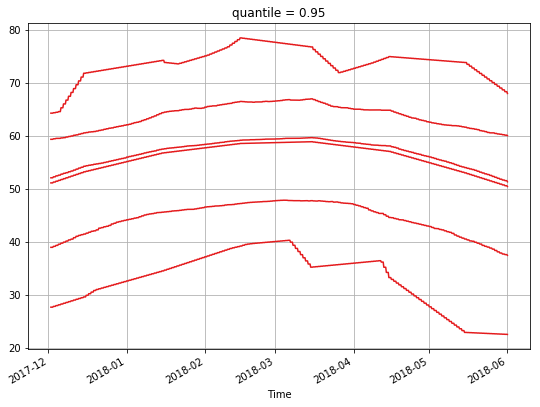

In [107]:
# def line_plot_clus(xa_low,nc,p,p_c, pargs = dict(), fun='mean'):
funs = ['mean','median','max','min','quantile','quantile'      ]
args = [{}    ,      {},   {},   {},{'q':.05},{'q':.95}        ]
pal = sns.color_palette('Set1',nc)
for i in range(1):
    for fun,arg in zip(funs,args):
        va = xa_low[p].where(xa_low[p_c]==i)
        va = getattr(va,fun)(dim=['south_north','west_east'],**arg)
        res = va.plot(color=pal[i])
ax = res[0].figure.axes[0]
ax.grid()

In [117]:
pdd = va.to_pandas()

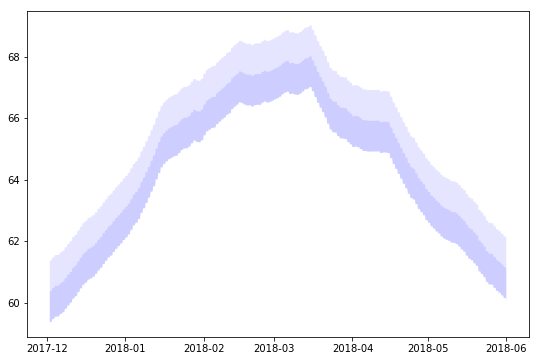

In [122]:
plt.fill_between(pdd.index,pdd.values,pdd.values+2,facecolor='blue',alpha=.1)
plt.fill_between(pdd.index,pdd.values,pdd.values+1,facecolor='blue',alpha=.1)

In [126]:
pars = {
    'min_max':{
        'min':{'fun':'min', 'arg':{}},
        'max':{'fun':'max', 'arg':{}}  },
    'quan_05-95':{
        '05':{'fun':'quantile', 'arg':{'q':.05}},
        '95':{'fun':'quantile', 'arg':{'q':.95}} }
}

In [199]:


def multiplot(va, f1, f2, arg1, arg2, col, ax, dim):
    va1 =getattr(va,f1)(dim=dim, **arg1).to_series()
    va2 =getattr(va,f2)(dim=dim, **arg2).to_series()
    ax.fill_between(va1.index,va1,va2, color = col, alpha=.2)
    return ax

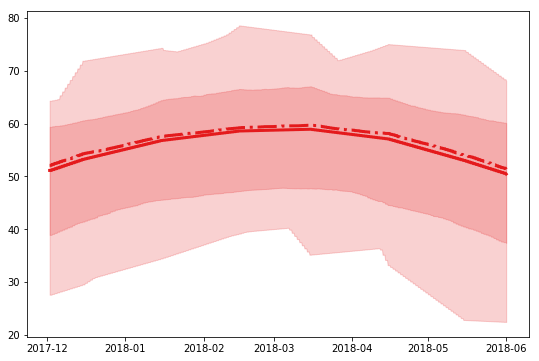

In [223]:
fig, ax = plt.subplots()
plt.close(fig)
i = 0
va  = xa_low[p].where(xa_low[p_c]==i)
dim = dim = ['south_north', 'west_east']
col = pal[i]


min_max = dict(
    col = col,
    f1 = 'min',
    f2 = 'max',
    arg1 = {},
    arg2 = {},
    va = va,
    ax =ax,
    dim=dim
)

per = dict(
    col = col,
    f1 = 'quantile',
    f2 = 'quantile',
    arg1 = {'q':.05},
    arg2 = {'q':.95},
    va = va,
    ax =ax,
    dim=dim
)


dics = [min_max,per]


for d in dics: multiplot(**d)

va1 = va.median(dim).to_series() 
ax.plot_date(va1.index,va1.values, 
             color = col, marker=None, linestyle='-.',linewidth=3)

va1 = va.mean(dim).to_series() 
ax.plot_date(va1.index,va1.values, 
             color = col, marker=None, linestyle='-',linewidth=3)
    
ax.figure

In [196]:
va1

<xarray.DataArray ()>
array(0.)